In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Veri seti hikayesi ve problem : Şeker hastalığı tahmini

In [3]:
df=pd.read_csv("diabetes/diabetes.csv")
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

# Logistic Regression

# Model & Tahmin

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [13]:
loj_model.intercept_

array([-5.89159518])

In [14]:
loj_model.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [15]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [16]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [17]:
y_pred = loj_model.predict(X)

In [18]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [19]:
accuracy_score(y, y_pred)

0.7747395833333334

In [20]:
print(classification_report(y, y_pred)) #daha detaylı sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [21]:
loj_model.predict_proba(X)[0:10] # sınıf olasılık değerlerine erişmek istersek

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

# Model Tuning( Model Doğrulama)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [23]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [24]:
y_pred = loj_model.predict(X_test)

In [25]:
print(accuracy_score(y_test, y_pred)) #test hatası değeri erişmek için #bu score ne kadar büyükse o kadar başarılı

0.7532467532467533


In [26]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

# K-En Yakın Komşu (KNN)

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

# Model & Tahmin

In [29]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning ( Model Doğrulama)

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [35]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [36]:
knn_cv_model.best_score_

0.748637316561845

In [37]:
knn_cv_model.best_params_

{'n_neighbors': 11}

# Final model

In [38]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [39]:
y_pred  = knn_tuned.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [41]:
knn_tuned.score(X_test, y_test) # yada pred kullanmadan pratik bir şekilde score hesaplanabilir

0.7316017316017316

# Support Vector Machines

# Model & Tahnin

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [45]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [46]:
svm_model

SVC(kernel='linear')

In [47]:
y_pred = svm_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [49]:
svm = SVC()

In [50]:
svm_params={"C": np.arange(1,3), "kernel": ["linear","rbf"]}

In [51]:
svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.7s finished


In [52]:
svm_cv_model.best_score_

0.7839044652128765

In [53]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

# Final model

In [54]:
svm_tuned = SVC(C=2, kernel = "linear").fit(X_train, y_train)

In [55]:
y_pred = svm_model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [57]:
svm_tuned.score(X_test, y_test)

0.7445887445887446

# Yapay Sinir Ağları

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

# model & tahmin

In [60]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

In [61]:
mlpc_model

MLPClassifier()

In [62]:
mlpc_model.coefs_ # bu sinir ağının kullanmıs olduğu farklı katmanlardaki farklı hücrelerin birbiriyle ilişkilerini ifade eden katsayılar

[array([[ 1.66831609e-01,  1.96236189e-02,  1.19639172e-01,
         -8.47547177e-03, -1.78266969e-01, -1.85302155e-01,
         -9.54689423e-02, -2.00837435e-01, -6.99437965e-02,
          8.75797768e-02, -9.80368886e-02,  1.95129539e-01,
         -1.27694165e-01, -1.62299362e-01, -2.53547703e-01,
         -7.50757104e-02,  1.43694883e-01,  1.67849808e-01,
          7.55693845e-02, -1.58878279e-01,  7.43395243e-07,
          6.95046436e-02, -5.28423341e-05,  1.68467191e-01,
          1.70764884e-01,  1.88482650e-01,  4.05884045e-02,
         -2.28570925e-03,  1.62183259e-01, -5.13452844e-02,
         -1.21326194e-01, -5.67917986e-02, -2.09314753e-01,
         -7.16677987e-02,  2.40917107e-01, -6.48807236e-02,
         -1.90182355e-02, -9.21971690e-03, -1.39166402e-01,
          7.33496052e-02,  4.97793791e-02, -1.56173848e-01,
         -1.36427924e-01,  8.20297604e-02, -2.46844552e-01,
          1.51509376e-01,  8.12735955e-03,  8.25536024e-02,
         -4.95590960e-02,  3.11298636e-0

In [63]:
?mlpc_model

In [64]:
y_pred = mlpc_model.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.7229437229437229

# model tuning

In [66]:
mlpc =  MLPClassifier()

In [67]:
mlpc_params= {"alpha":[1,2,3,4,0.1,0.01,0.03,0.05,0.0001],
             "hidden_layer_sizes":[(10,10),(100,100,100), (100,100), (3,5)]}

In [68]:
mlpc = MLPClassifier(solver = "lbfgs", activation="logistic")

In [69]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   48.7s finished
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
mlpc_cv_model

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [1, 2, 3, 4, 0.1, 0.01, 0.03, 0.05, 0.0001],
                         'hidden_layer_sizes': [(10, 10), (100, 100, 100),
                                                (100, 100), (3, 5)]},
             verbose=2)

In [71]:
mlpc_cv_model.best_params_

{'alpha': 3, 'hidden_layer_sizes': (100, 100)}

# final model

In [72]:
mlpc_tuned = MLPClassifier(solver = "lbfgs", alpha = 4, hidden_layer_sizes=(100,100)).fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [73]:
y_pred = mlpc_tuned.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.7186147186147186

# CART

In [75]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

# model & tahmin

In [77]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [78]:
cart_model

DecisionTreeClassifier()

In [79]:
accuracy_score(y_test, y_pred)

0.7186147186147186

# model Tuning

In [80]:
cart = DecisionTreeClassifier()

In [81]:
cart_params = {"max_depth": [2,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [82]:
cart_cv_model = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


In [83]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

# final model

In [84]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split=20).fit(X_train, y_train)

In [85]:
y_pred = cart_tuned.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forest

# model&tahmin

In [87]:
rfs_model = RandomForestClassifier().fit(X_train, y_train)

In [88]:
rfs_model

RandomForestClassifier()

In [89]:
y_pred = rfs_model.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.7402597402597403

# model tuning

In [91]:
rfs = RandomForestClassifier()

In [92]:
rfs_params = {"n_estimators": [100,200,500,1000],
             "max_features": [3,5,7,8],
             "min_samples_split":[2,5,10,20]}

In [93]:
rfs_cv_model = GridSearchCV(rfs, rfs_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.2min finished


In [94]:
rfs_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 2, 'n_estimators': 200}

# final model

In [95]:
rfs_tuned =RandomForestClassifier(max_features=5,min_samples_split=5,n_estimators=500).fit(X_train, y_train)

In [96]:
y_pred =  rfs_tuned.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred)

0.7489177489177489

# değişken önem düzeyleri

Text(0.5, 1.0, 'Değişken Önem Düzeyleri')

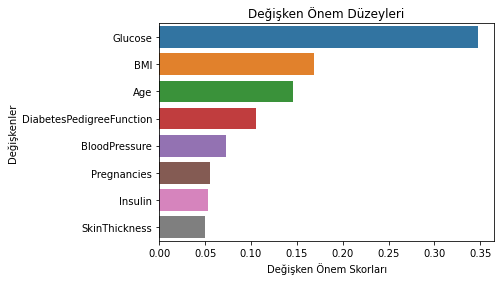

In [98]:
feature_imp = pd.Series(rfs_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")

# Gradient Boosting Machines (GBM)

# model&tahmin

In [99]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [100]:
gbm_model

GradientBoostingClassifier()

In [101]:
y_pred = gbm_model.predict(X_test)

In [102]:
accuracy_score(y_test, y_pred)

0.7489177489177489

# model tuning

In [103]:
gbm = GradientBoostingClassifier()

In [104]:
gbm_params = {"learning_rate": [0.1,0.01,0.001,0.05],
             "n_estimators":[100,300,500,1000],
             "max_depth":[2,3,5,8]}

In [105]:
gbm_cv_model=GridSearchCV(gbm,gbm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.1min finished


In [106]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

# final model

In [107]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01,max_depth=3,n_estimators=500).fit(X_train, y_train)

In [108]:
y_pred=gbm_tuned.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.7402597402597403

Text(0.5, 1.0, 'Değişken Önem Düzeyleri')

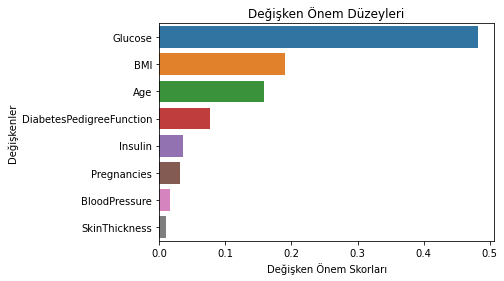

In [110]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")

# XGBoost

# model&tahmin

In [111]:
!pip install xgboost

In [112]:
from xgboost import XGBClassifier

In [113]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [114]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
?xgb_model

In [116]:
y_pred=xgb_model.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred)

0.7359307359307359

# model tuning

In [118]:
xgb=XGBClassifier()

In [119]:
xgb_params= {"n_estimators":[100,500,1000,2000],
            "subsample": [0.6,0.8,1],
            "max_depth":[3,5,7],
            "learnin_rate":[0.1,0.001,0.01]}

In [120]:
xgb_cv_model = GridSearchCV(xgb,xgb_params, cv=5,n_jobs=-1,verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.5s


[19:55:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learnin_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   56.2s finished


In [121]:
xgb_cv_model.best_params_

{'learnin_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

# final model

In [122]:
xgb_tuned =XGBClassifier(learnin_rate=0.1,max_depth=3,n_estimators=100,subsample=0.6).fit(X_train, y_train)

[19:55:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learnin_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [123]:
y_pred = xgb_tuned.predict(X_test)

In [124]:
accuracy_score(y_pred, y_test)

0.7272727272727273

Text(0.5, 1.0, 'Değişken Önem Düzeyleri')

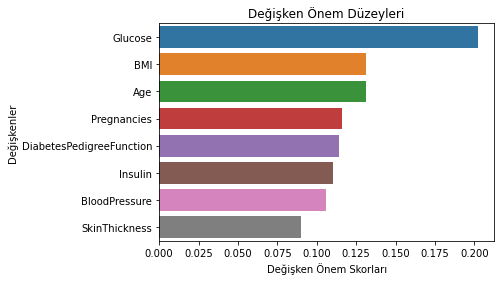

In [125]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")

# Light GBM

In [126]:
!pip install lightgbm

In [127]:
from lightgbm import LGBMClassifier

In [128]:
lgbm_model =LGBMClassifier().fit(X_train, y_train)

In [129]:
lgbm_model

LGBMClassifier()

In [130]:
?lgbm_model

In [131]:
y_pred=lgbm_model.predict(X_test)

In [132]:
accuracy_score(y_test,y_pred)

0.7229437229437229

# model tuning

In [133]:
lgbm=LGBMClassifier()

In [134]:
lgbm_params = {"learning_rate":[0.001,0.01,0.1],
              "n_estimators": [200,500,100],
              "max_depth":[1,2,35,8]}

In [135]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.8s


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished


In [136]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}

# final model

In [137]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,max_depth=8,n_estimators=100).fit(X_train, y_train)

In [138]:
y_pred=lgbm_tuned.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred)

0.7662337662337663

Text(0.5, 1.0, 'Değişken Önem Düzeyleri')

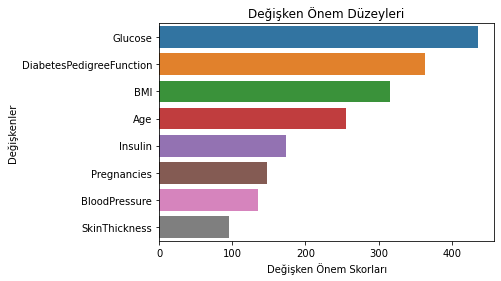

In [140]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")

# CatBoost

# model&tahmin

In [141]:
!pip install catboost

In [142]:
from catboost import CatBoostClassifier

In [143]:
catb_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 78.4ms	remaining: 1m 18s
1:	learn: 0.6843544	total: 83ms	remaining: 41.4s
2:	learn: 0.6805937	total: 86.5ms	remaining: 28.8s
3:	learn: 0.6766011	total: 90.3ms	remaining: 22.5s
4:	learn: 0.6721103	total: 93.6ms	remaining: 18.6s
5:	learn: 0.6681927	total: 96ms	remaining: 15.9s
6:	learn: 0.6642263	total: 98ms	remaining: 13.9s
7:	learn: 0.6603263	total: 100ms	remaining: 12.4s
8:	learn: 0.6563030	total: 102ms	remaining: 11.2s
9:	learn: 0.6528911	total: 105ms	remaining: 10.4s
10:	learn: 0.6488276	total: 107ms	remaining: 9.61s
11:	learn: 0.6455457	total: 109ms	remaining: 8.98s
12:	learn: 0.6419444	total: 111ms	remaining: 8.44s
13:	learn: 0.6374939	total: 113ms	remaining: 7.98s
14:	learn: 0.6340194	total: 115ms	remaining: 7.58s
15:	learn: 0.6304776	total: 117ms	remaining: 7.22s
16:	learn: 0.6267531	total: 120ms	remaining: 6.92s
17:	learn: 0.6238199	total: 122ms	remaining: 6.63s
18:	learn: 0.6204938	total: 123ms	remaining: 6.38s
19:	learn: 

190:	learn: 0.3865013	total: 489ms	remaining: 2.07s
191:	learn: 0.3858420	total: 492ms	remaining: 2.07s
192:	learn: 0.3851892	total: 494ms	remaining: 2.07s
193:	learn: 0.3846598	total: 496ms	remaining: 2.06s
194:	learn: 0.3840737	total: 498ms	remaining: 2.06s
195:	learn: 0.3837046	total: 500ms	remaining: 2.05s
196:	learn: 0.3832085	total: 502ms	remaining: 2.04s
197:	learn: 0.3827921	total: 504ms	remaining: 2.04s
198:	learn: 0.3823105	total: 506ms	remaining: 2.03s
199:	learn: 0.3818350	total: 508ms	remaining: 2.03s
200:	learn: 0.3815497	total: 509ms	remaining: 2.02s
201:	learn: 0.3809861	total: 511ms	remaining: 2.02s
202:	learn: 0.3805201	total: 514ms	remaining: 2.02s
203:	learn: 0.3800554	total: 516ms	remaining: 2.01s
204:	learn: 0.3796176	total: 519ms	remaining: 2.01s
205:	learn: 0.3791170	total: 521ms	remaining: 2.01s
206:	learn: 0.3783718	total: 524ms	remaining: 2.01s
207:	learn: 0.3780501	total: 526ms	remaining: 2s
208:	learn: 0.3773893	total: 528ms	remaining: 2s
209:	learn: 0.3766

426:	learn: 0.3027756	total: 972ms	remaining: 1.3s
427:	learn: 0.3025508	total: 974ms	remaining: 1.3s
428:	learn: 0.3022920	total: 976ms	remaining: 1.3s
429:	learn: 0.3020336	total: 977ms	remaining: 1.29s
430:	learn: 0.3018311	total: 979ms	remaining: 1.29s
431:	learn: 0.3016490	total: 981ms	remaining: 1.29s
432:	learn: 0.3014655	total: 983ms	remaining: 1.29s
433:	learn: 0.3011402	total: 985ms	remaining: 1.28s
434:	learn: 0.3008430	total: 987ms	remaining: 1.28s
435:	learn: 0.3005948	total: 989ms	remaining: 1.28s
436:	learn: 0.3003246	total: 991ms	remaining: 1.28s
437:	learn: 0.2998332	total: 994ms	remaining: 1.27s
438:	learn: 0.2995628	total: 996ms	remaining: 1.27s
439:	learn: 0.2993476	total: 998ms	remaining: 1.27s
440:	learn: 0.2992118	total: 1s	remaining: 1.27s
441:	learn: 0.2989786	total: 1s	remaining: 1.26s
442:	learn: 0.2987332	total: 1s	remaining: 1.26s
443:	learn: 0.2983521	total: 1.01s	remaining: 1.26s
444:	learn: 0.2981144	total: 1.01s	remaining: 1.26s
445:	learn: 0.2979409	to

659:	learn: 0.2505100	total: 1.46s	remaining: 752ms
660:	learn: 0.2501853	total: 1.46s	remaining: 750ms
661:	learn: 0.2500339	total: 1.46s	remaining: 747ms
662:	learn: 0.2498808	total: 1.47s	remaining: 745ms
663:	learn: 0.2496646	total: 1.47s	remaining: 743ms
664:	learn: 0.2493293	total: 1.47s	remaining: 741ms
665:	learn: 0.2491573	total: 1.47s	remaining: 738ms
666:	learn: 0.2489233	total: 1.47s	remaining: 736ms
667:	learn: 0.2488568	total: 1.48s	remaining: 734ms
668:	learn: 0.2486144	total: 1.48s	remaining: 732ms
669:	learn: 0.2483773	total: 1.48s	remaining: 730ms
670:	learn: 0.2482201	total: 1.48s	remaining: 727ms
671:	learn: 0.2481445	total: 1.49s	remaining: 725ms
672:	learn: 0.2480453	total: 1.49s	remaining: 723ms
673:	learn: 0.2478585	total: 1.49s	remaining: 720ms
674:	learn: 0.2477204	total: 1.49s	remaining: 719ms
675:	learn: 0.2476415	total: 1.5s	remaining: 717ms
676:	learn: 0.2473815	total: 1.5s	remaining: 715ms
677:	learn: 0.2471798	total: 1.5s	remaining: 712ms
678:	learn: 0.2

869:	learn: 0.2122840	total: 1.93s	remaining: 288ms
870:	learn: 0.2120469	total: 1.93s	remaining: 286ms
871:	learn: 0.2118639	total: 1.93s	remaining: 284ms
872:	learn: 0.2117496	total: 1.93s	remaining: 281ms
873:	learn: 0.2114516	total: 1.94s	remaining: 279ms
874:	learn: 0.2111775	total: 1.94s	remaining: 277ms
875:	learn: 0.2110101	total: 1.94s	remaining: 275ms
876:	learn: 0.2107460	total: 1.94s	remaining: 273ms
877:	learn: 0.2106560	total: 1.95s	remaining: 270ms
878:	learn: 0.2104605	total: 1.95s	remaining: 268ms
879:	learn: 0.2103590	total: 1.95s	remaining: 266ms
880:	learn: 0.2103160	total: 1.95s	remaining: 264ms
881:	learn: 0.2102141	total: 1.95s	remaining: 261ms
882:	learn: 0.2098803	total: 1.96s	remaining: 259ms
883:	learn: 0.2097233	total: 1.96s	remaining: 257ms
884:	learn: 0.2095986	total: 1.96s	remaining: 255ms
885:	learn: 0.2094989	total: 1.96s	remaining: 252ms
886:	learn: 0.2092139	total: 1.96s	remaining: 250ms
887:	learn: 0.2090122	total: 1.97s	remaining: 248ms
888:	learn: 

In [144]:
y_pred=catb_model.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred)

0.7402597402597403

# model tuning

In [146]:
catb=CatBoostClassifier()

In [147]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.03,0.1],
            "depth":[4,5,8]}

In [148]:
catb_cv_model=GridSearchCV(catb,catb_params, cv=5, n_jobs=-1,  verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.4min finished


0:	learn: 0.6730562	total: 5ms	remaining: 996ms
1:	learn: 0.6583303	total: 9.27ms	remaining: 918ms
2:	learn: 0.6413852	total: 13.3ms	remaining: 871ms
3:	learn: 0.6268405	total: 17.1ms	remaining: 838ms
4:	learn: 0.6150883	total: 21ms	remaining: 817ms
5:	learn: 0.5989093	total: 24.7ms	remaining: 799ms
6:	learn: 0.5861303	total: 28.7ms	remaining: 793ms
7:	learn: 0.5735117	total: 32.5ms	remaining: 780ms
8:	learn: 0.5616370	total: 36.3ms	remaining: 771ms
9:	learn: 0.5507706	total: 40.5ms	remaining: 770ms
10:	learn: 0.5388394	total: 44.6ms	remaining: 766ms
11:	learn: 0.5264516	total: 48.9ms	remaining: 766ms
12:	learn: 0.5191660	total: 53ms	remaining: 763ms
13:	learn: 0.5104459	total: 57.3ms	remaining: 761ms
14:	learn: 0.5017018	total: 61.1ms	remaining: 754ms
15:	learn: 0.4954928	total: 64.9ms	remaining: 746ms
16:	learn: 0.4896817	total: 68.8ms	remaining: 740ms
17:	learn: 0.4808546	total: 72.6ms	remaining: 734ms
18:	learn: 0.4724010	total: 76.8ms	remaining: 732ms
19:	learn: 0.4657244	total: 8

196:	learn: 0.1519591	total: 860ms	remaining: 13.1ms
197:	learn: 0.1513487	total: 864ms	remaining: 8.73ms
198:	learn: 0.1508775	total: 869ms	remaining: 4.37ms
199:	learn: 0.1496718	total: 875ms	remaining: 0us


In [149]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.03}

# final model

In [150]:
catb_tuned =CatBoostClassifier(depth=8,iterations=200,learning_rate=0.03).fit(X_train, y_train)

0:	learn: 0.6730562	total: 18.6ms	remaining: 3.7s
1:	learn: 0.6583303	total: 36.8ms	remaining: 3.64s
2:	learn: 0.6413852	total: 54.3ms	remaining: 3.57s
3:	learn: 0.6268405	total: 61.6ms	remaining: 3.02s
4:	learn: 0.6150883	total: 67.4ms	remaining: 2.63s
5:	learn: 0.5989093	total: 72.7ms	remaining: 2.35s
6:	learn: 0.5861303	total: 77ms	remaining: 2.12s
7:	learn: 0.5735117	total: 81.6ms	remaining: 1.96s
8:	learn: 0.5616370	total: 85.9ms	remaining: 1.82s
9:	learn: 0.5507706	total: 90.1ms	remaining: 1.71s
10:	learn: 0.5388394	total: 94.6ms	remaining: 1.63s
11:	learn: 0.5264516	total: 99.2ms	remaining: 1.55s
12:	learn: 0.5191660	total: 103ms	remaining: 1.49s
13:	learn: 0.5104459	total: 107ms	remaining: 1.43s
14:	learn: 0.5017018	total: 111ms	remaining: 1.37s
15:	learn: 0.4954928	total: 116ms	remaining: 1.33s
16:	learn: 0.4896817	total: 120ms	remaining: 1.29s
17:	learn: 0.4808546	total: 124ms	remaining: 1.25s
18:	learn: 0.4724010	total: 128ms	remaining: 1.22s
19:	learn: 0.4657244	total: 132m

179:	learn: 0.1660508	total: 872ms	remaining: 96.9ms
180:	learn: 0.1653085	total: 877ms	remaining: 92.1ms
181:	learn: 0.1643963	total: 882ms	remaining: 87.2ms
182:	learn: 0.1635574	total: 887ms	remaining: 82.4ms
183:	learn: 0.1627505	total: 892ms	remaining: 77.6ms
184:	learn: 0.1620530	total: 898ms	remaining: 72.8ms
185:	learn: 0.1616087	total: 902ms	remaining: 67.9ms
186:	learn: 0.1606996	total: 907ms	remaining: 63ms
187:	learn: 0.1597629	total: 911ms	remaining: 58.1ms
188:	learn: 0.1590408	total: 915ms	remaining: 53.3ms
189:	learn: 0.1586038	total: 919ms	remaining: 48.4ms
190:	learn: 0.1578480	total: 924ms	remaining: 43.5ms
191:	learn: 0.1571188	total: 928ms	remaining: 38.7ms
192:	learn: 0.1561423	total: 933ms	remaining: 33.8ms
193:	learn: 0.1555195	total: 939ms	remaining: 29ms
194:	learn: 0.1541191	total: 944ms	remaining: 24.2ms
195:	learn: 0.1528584	total: 949ms	remaining: 19.4ms
196:	learn: 0.1519591	total: 954ms	remaining: 14.5ms
197:	learn: 0.1513487	total: 958ms	remaining: 9.68

In [151]:
y_pred=catb_tuned.predict(X_test)

In [152]:
accuracy_score(y_test, y_pred)

0.7489177489177489

Text(0.5, 1.0, 'Değişken Önem Düzeyleri')

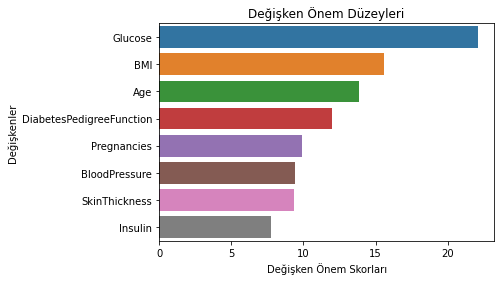

In [153]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")

# TÜM MODELLERİN KARŞILAŞTIRMASI

In [154]:
modeller = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rfs_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

In [155]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,71.861472
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.891775
0,GradientBoostingClassifier,74.025974
0,CatBoostClassifier,74.891775
0,LGBMClassifier,76.623377
0,XGBClassifier,72.727273


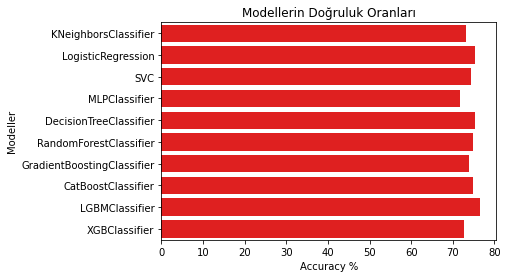

In [156]:
sns.barplot(x = "Accuracy", y = "Modeller", data=sonuclar, color="r")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları");